## h/t https://github.com/davidsbatista/text-classification/blob/master/IMDB-movie-genre-classification.ipynb

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML

css = open("style-table.css").read() + open("style-notebook.css").read()
HTML("<style>{}</style>".format(css))

In [3]:
cast = pd.read_csv('data/cast.csv')

In [4]:
genres = pd.read_csv('movies_genres.csv', sep='\t')

In [5]:
def get_title(t):
    try:
        return t.split('"')[1]
    except:
        return None

def get_year(t):    
    try:
        return round(int(t.split('"')[2][2:].split(')')[0]))
    except:
        return None

genres['full_title'] = genres['title']
genres['title'] = genres['full_title'].apply(get_title)
genres['year'] = genres['full_title'].apply(get_year)

In [6]:
genres.sample(20)

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,full_title,year
43191,Homicide,10 : A man dies a violent death aboard a boat...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"""Homicide"" (1964) {The Hook (#2.1)}",1964.0
10040,Beneath the Lies,"Within the city of Kampala, lies a seedy unde...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,"""Beneath the Lies"" (2014)",2014.0
72194,Rakett 69,Tonight's episode is all about electricity an...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"""Rakett 69"" (2011) {Electricity (Elekter) (#6.9)}",2011.0
82196,Sprinter Galore,"Sprinter gets the flu, but has never tried be...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"""Sprinter Galore"" (2016) {Sygdom (#1.9)}",2016.0
17074,Chelsea Lately,"In her opening monologue, host 'Chelsea Handl...",0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,"""Chelsea Lately"" (2007) {(#6.99)}",2007.0
108677,Trial & Retribution,Teenager Cassie Booth disappears whilst on he...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,"""Trial & Retribution"" (1997) {(#3.1)}",1997.0
31715,Fairly Legal,While mediating a case regarding two women wh...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"""Fairly Legal"" (2011) {Finale (#2.13)}",2011.0
81528,Spangas,Tijdens de auditie leeft Django erg mee met L...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"""Spangas"" (2007) {Lef geeft Django advies (#9....",2007.0
12957,Born Again Virgin,"Jenna (Danielle Nicolet), a 34 year-old up-an...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"""Born Again Virgin"" (2015)",2015.0
45959,Inside Outlook,There are over 2.4 million people sitting in ...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,"""Inside Outlook"" (2014) {Mass Incarceration (#...",2014.0


In [7]:
genres.set_index(['title', 'year'], inplace=True)

In [8]:
cast.set_index(['title', 'year'], inplace=True)

In [9]:
cast_gen = cast.join(genres)

In [10]:
list(map(lambda l: l.dtype, cast.index.levels))

[dtype('O'), dtype('int64')]

In [11]:
genres.head()

plot  Action  \
title       year                                                                
#7DaysLater 2013.0   #7dayslater is an interactive comedy series f...       0   
#BlackLove  2015.0   With just one week left in the workshops, the...       0   
            2015.0   All of the women start making strides towards...       0   
            2015.0   All five of these women are independent and s...       0   
            2015.0   Despite having gone through a life changing p...       0   

                    Adult  Adventure  Animation  Biography  Comedy  Crime  \
title       year                                                            
#7DaysLater 2013.0      0          0          0          0       1      0   
#BlackLove  2015.0      0          0          0          0       0      0   
            2015.0      0          0          0          0       0      0   
            2015.0      0          0          0          0       0      0   
            2015.0      0          0          0          0       0      0   

                    Documentary  Drama  ...  Reality-TV  Romance  Sci-Fi  \
title       year                        ...                                
#7DaysLater 2013.0            0      0  ...           0        0       0   
#BlackLove  2015.0            0      0  ...           1        0       0   
            2015.0            0      0  ...           1        0       0   
            2015.0            0      0  ...           1        0       0   
            2015.0            0      0  ...           1        0       0   

                    Short  Sport  Talk-Show  Thriller  War  Western  \
title       year                                                      
#7DaysLater 2013.0      0      0          0         0    0        0   
#BlackLove  2015.0      0      0          0         0    0        0   
            2015.0      0      0          0         0    0        0   
            2015.0      0      0          0         0    0        0   
            2015.0      0      0          0         0    0        0   

                                                           full_title  
title       year                                                       
#7DaysLater 2013.0                               "#7DaysLater" (2013)  
#BlackLove  2015.0       "#BlackLove" (2015) {Crash the Party (#1.9)}  
            2015.0  "#BlackLove" (2015) {Making Lemonade Out of Le...  
            2015.0      "#BlackLove" (2015) {Miss Independent (#1.5)}  
            2015.0     "#BlackLove" (2015) {Sealing the Deal (#1.10)}  

[5 rows x 30 columns]

In [12]:
cast_gen = cast_gen.dropna()

In [13]:
genre_count = genres.drop(['plot', 'full_title'], axis=1)

In [14]:
genre_count.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 117352 entries, (#7DaysLater, 2013.0) to (Über Österreich - Juwele des Landes, 2016.0)
Data columns (total 28 columns):
Action         117352 non-null int64
Adult          117352 non-null int64
Adventure      117352 non-null int64
Animation      117352 non-null int64
Biography      117352 non-null int64
Comedy         117352 non-null int64
Crime          117352 non-null int64
Documentary    117352 non-null int64
Drama          117352 non-null int64
Family         117352 non-null int64
Fantasy        117352 non-null int64
Game-Show      117352 non-null int64
History        117352 non-null int64
Horror         117352 non-null int64
Lifestyle      117352 non-null int64
Music          117352 non-null int64
Musical        117352 non-null int64
Mystery        117352 non-null int64
News           117352 non-null int64
Reality-TV     117352 non-null int64
Romance        117352 non-null int64
Sci-Fi         117352 non-null int64
Short          1

### Which genres are the most popular?

In [15]:
genre_count.sum(axis=0).sort_values()

Lifestyle          0
Adult             61
Short            578
Musical          596
Biography       1385
War             1407
Sport           1947
Game-Show       2048
Horror          2571
History         2662
Western         2761
Music           2841
News            3946
Talk-Show       5254
Fantasy         7103
Sci-Fi          8658
Thriller        8856
Adventure      10245
Animation      11375
Documentary    12020
Mystery        12030
Reality-TV     12338
Action         12381
Crime          15133
Family         15442
Romance        19242
Comedy         33875
Drama          46017
dtype: int64

### Which words are typically used in plot description of drama movies?

In [16]:
dramas = genres[genres.Drama == 1]
plots = dramas['plot'].values

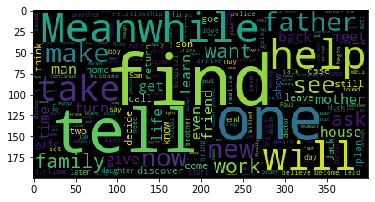

In [17]:
txt = ' '.join(plots)

import wordcloud
import matplotlib.pyplot as plt

wc = wordcloud.WordCloud()
cloud = wc.generate(txt)
plt.imshow(cloud)



### Let's try again without almost meaningless words like 'Meanwhile', 'will', 'one'

In [18]:
type(wordcloud.STOPWORDS)

set

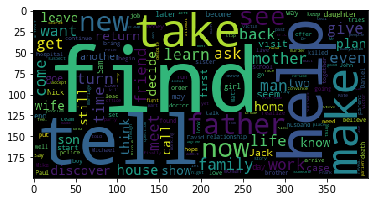

In [19]:
wordcloud.STOPWORDS.update(['Meanwhile', 'will', 'one'])
cloud = wc.generate(txt)
plt.imshow(cloud)


### How about the Sci-Fi genre?

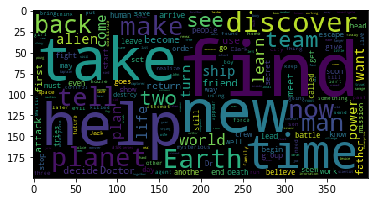

In [20]:
scifis = genres[genres['Sci-Fi'] == 1]
plots = scifis['plot'].values
txt = ' '.join(plots)
cloud = wc.generate(txt)
plt.imshow(cloud)

### Hmm, there seem to be a lot of verbs like 'find' and 'take'. How about the nouns? Are there different nonus for drama and science fiction?

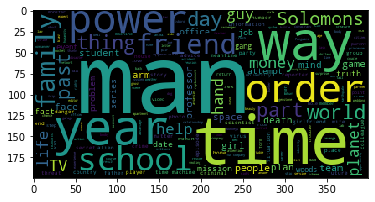

In [23]:
import spacy
from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")
plots = scifis['plot'].values
txt = ' '.join(plots[:200])
doc = nlp(txt)
nouns = list(filter(lambda w: 'NOUN' == w.pos_, doc))
nouns_txt = ' '.join(map(lambda w: str(w), nouns))
cloud = wc.generate(nouns_txt)
plt.imshow(cloud)

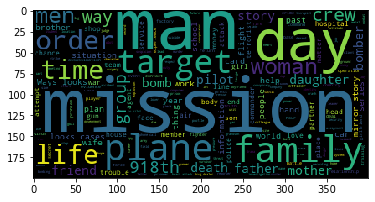

In [24]:
nlp = spacy.load("en_core_web_sm")
plots = dramas['plot'].values
txt = ' '.join(plots[:200])
doc = nlp(txt)
nouns = list(filter(lambda w: 'NOUN' == w.pos_, doc))
nouns_txt = ' '.join(map(lambda w: str(w), nouns))
cloud = wc.generate(nouns_txt)
plt.imshow(cloud)
